In [6]:
import tensorflow as tf
import keras

In [7]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,500)

    for size in matrix_sizes:
        print("####### Matrix size: " + str(size) + " #######")
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)

            with tf.Session(config=tf.ConfigProto(log_device_placement=False)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    #print(result)
                    device_times[device_name].append(time_taken)
            print("Time taken:", time_taken)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


####### Matrix size: 500 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.03591728210449219
####### Calculating on the /cpu:0 #######
Time taken: 0.47422122955322266
####### Matrix size: 1000 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.015610694885253906
####### Calculating on the /cpu:0 #######
Time taken: 3.7246181964874268
####### Matrix size: 1500 #######
####### Calculating on the /gpu:0 #######
Time taken: 0.029769182205200195
####### Calculating on the /cpu:0 #######
Time taken: 12.550425052642822
{'/gpu:0': [0.03591728210449219, 0.015610694885253906, 0.029769182205200195], '/cpu:0': [0.47422122955322266, 3.7246181964874268, 12.550425052642822]}


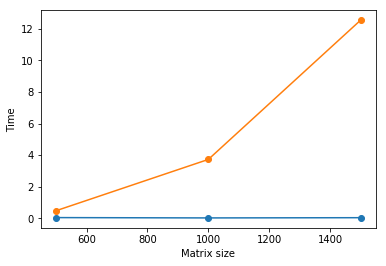

In [8]:
device_times, matrix_sizes = get_times(10) # Change the number to specify maximum cut-off compute time (in seconds) after which the comparison script is terminated and results displayed.
print(device_times)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9900956676163086060
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3204366336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18301858048078372363
physical_device_desc: "device: 0, name: Quadro M1200, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [10]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']